In [4]:
!pip install kaggle


   ---------------------------------------- 0.0/173.2 kB ? eta -:--:--
   -- ------------------------------------- 10.2/173.2 kB ? eta -:--:--
   ------ -------------------------------- 30.7/173.2 kB 660.6 kB/s eta 0:00:01
   ------------- ------------------------- 61.4/173.2 kB 544.7 kB/s eta 0:00:01
   -------------------------- ----------- 122.9/173.2 kB 722.1 kB/s eta 0:00:01
   -------------------------------------- 173.2/173.2 kB 866.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/78.2 kB ? eta -:--:--
   ------------------------------------ --- 71.7/78.2 kB 3.8 MB/s eta 0:00:01
   ---------------------------------------- 78.2/78.2 kB 2.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
!pip install mediapipe

  Using cached mediapipe-0.10.21-cp312-cp312-win_amd64.whl.metadata (10 kB)
  Using cached jax-0.5.2-py3-none-any.whl.metadata (22 kB)
  Using cached jaxlib-0.5.1-cp312-cp312-win_amd64.whl.metadata (1.0 kB)
  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
  Using cached opencv_contrib_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached sounddevice-0.5.1-py3-none-win_amd64.whl.metadata (1.4 kB)
Using cached mediapipe-0.10.21-cp312-cp312-win_amd64.whl (51.0 MB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
Using cached sounddevice-0.5.1-py3-none-win_amd64.whl (363 kB)
Using cached jax-0.5.2-py3-none-any.whl (2.4 MB)
Using cached jaxlib-0.5.1-cp312-cp312-win_amd64.whl (65.2 MB)
Using cached opencv_contrib_python-4.11.0.86-cp37-abi3-win_amd64.whl (46.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.3
    Uninstalling numpy-2.2.3:
      Successfully uninstalled numpy-2.2.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 4.41.2 requires huggingface-hub<1.0,>=0.23.0, but you have huggingface-hub 0.20.3 which is incompatible.
transformers 4.41.2 requires tokenizers<0.20,>=0.19, but you have tokenizers 0.15.2 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
!pip uninstall kaggle -y
!pip install kaggle --upgrade


Found existing installation: kaggle 1.7.4
Uninstalling kaggle-1.7.4:
  Successfully uninstalled kaggle-1.7.4
   ---------------------------------------- 0.0/173.2 kB ? eta -:--:--
   -- ------------------------------------- 10.2/173.2 kB ? eta -:--:--
   -- ------------------------------------- 10.2/173.2 kB ? eta -:--:--
   -- ------------------------------------- 10.2/173.2 kB ? eta -:--:--
   ------ -------------------------------- 30.7/173.2 kB 187.9 kB/s eta 0:00:01
   --------- ----------------------------- 41.0/173.2 kB 196.9 kB/s eta 0:00:01
   ---------------- ---------------------- 71.7/173.2 kB 262.6 kB/s eta 0:00:01
   -------------------- ------------------ 92.2/173.2 kB 308.0 kB/s eta 0:00:01
   ------------------------------- ------ 143.4/173.2 kB 405.9 kB/s eta 0:00:01
   -------------------------------------- 173.2/173.2 kB 434.5 kB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()


In [15]:
import os

os.environ["KAGGLE_USERNAME"] = "diipti"
os.environ["KAGGLE_KEY"] = "8a71eb1e168f2679585124906505a68b"

import kaggle
kaggle.api.authenticate()
print("Authenticated successfully!")


Authenticated successfully!


In [16]:
import kaggle
! kaggle datasets download -d grassknoted/asl-alphabet


Dataset URL: https://www.kaggle.com/datasets/grassknoted/asl-alphabet
License(s): GPL-2.0


In [17]:
import zipfile
import os

# Path to the downloaded zip file
zip_path = 'asl-alphabet.zip'

# Folder where you want to extract the dataset
extract_path = 'asl_alphabet'

# Unzip the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")


Dataset extracted successfully!


In [22]:
import cv2
import numpy as np
import mediapipe as mp
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from IPython.display import display, Image, clear_output

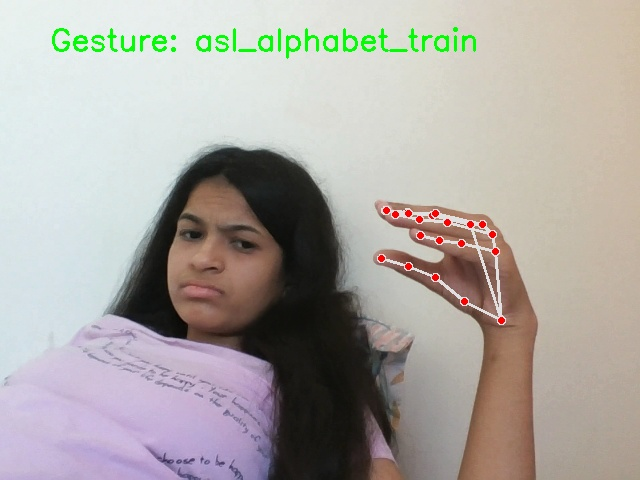

In [ ]:
# Paths
MODEL_PATH = 'asl_model.h5'
TRAIN_DIR = 'asl_alphabet'

#  Step 1: Load or Train the Model
def load_or_train_model():
    if os.path.exists(MODEL_PATH):
        print(" Loading existing model...")
        return tf.keras.models.load_model(MODEL_PATH)

    print(" Training new model...")

    # Image augmentation
    datagen = ImageDataGenerator(rescale=1.0 / 255, validation_split=0.2)

    # Training and validation sets
    train_gen = datagen.flow_from_directory(
        TRAIN_DIR,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        subset='training'
    )
    val_gen = datagen.flow_from_directory(
        TRAIN_DIR,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        subset='validation'
    )

    # CNN model
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(len(train_gen.class_indices), activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train model
    model.fit(train_gen, validation_data=val_gen, epochs=10)

    # Save model
    model.save(MODEL_PATH)

    return model, list(train_gen.class_indices.keys())

# Step 2: Initialize MediaPipe for Hand Detection
def init_hand_tracking():
    mp_hands = mp.solutions.hands
    hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.7)
    mp_draw = mp.solutions.drawing_utils
    return hands, mp_draw

# Step 3: Real-Time ASL Detection
def asl_interpreter(model, asl_labels):
    print("Starting Real-Time ASL Interpreter...")

    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("Error: Cannot access the webcam.")
        return
    
    hands, mp_draw = init_hand_tracking()

    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                print("Failed to read from webcam.")
                break

            # Convert frame for MediaPipe
            rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            result = hands.process(rgb_frame)

            # Detect and classify ASL gesture
            if result.multi_hand_landmarks:
                for hand_landmarks in result.multi_hand_landmarks:
                    mp_draw.draw_landmarks(frame, hand_landmarks, mp.solutions.hands.HAND_CONNECTIONS)

                    # Resize and preprocess image
                    img_resized = cv2.resize(frame, (64, 64)) / 255.0
                    img_array = np.expand_dims(img_resized, axis=0)

                    # Predict gesture
                    prediction = model.predict(img_array, verbose=0)
                    gesture = asl_labels[np.argmax(prediction)]

                    # Display gesture on frame
                    cv2.putText(frame, f'Gesture: {gesture}', (50, 50),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
            else:
                cv2.putText(frame, 'No Hand Detected', (50, 50),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

            # Display frame in Jupyter Notebook
            _, encoded_frame = cv2.imencode('.jpg', frame)
            clear_output(wait=True)
            display(Image(data=encoded_frame.tobytes()))

    finally:
        cap.release()
        cv2.destroyAllWindows()

# Step 4: Run the ASL Interpreter
if __name__ == '__main__':
    model, asl_labels = load_or_train_model()
    asl_interpreter(model, asl_labels)
